In [51]:
import networkx
import numpy as np
import requests

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data_path = "../../data/citations.csv"
full = networkx.read_adjlist("../../data/citations.csv", delimiter=",", create_using=networkx.DiGraph)

In [4]:
print("Is directed: " + str(full.is_directed()))
print("#cases = " + str(len(full)))

Is directed: True
#cases = 4911157


In [5]:
num_neighbors_mapping = {n: len(list(full.neighbors(n))) for n in full.nodes}

In [6]:
num_neighbors = list(num_neighbors_mapping.values())

In [7]:
print("Average number of cases cited:")
sum(num_neighbors) / len(num_neighbors)

Average number of cases cited:


8.726009370093442

In [8]:
print("About a tenth (" + \
str(len([n for n in num_neighbors if n == 0])) + "/" + str(len(full)) + \
") of the cases cite no other cases.")

About a tenth (463699/4911157) of the cases cite no other cases.


In [9]:
num_neighbors.sort()
print("The case that cites the most other cases cites " + str(num_neighbors[-1]) + " cases")
print("Top ten: " + str(num_neighbors[-1:-10:-1]))

The case that cites the most other cases cites 2951 cases
Top ten: [2951, 653, 637, 590, 573, 535, 516, 514, 491]


In [10]:
[case_id for case_id, num_cited in num_neighbors_mapping.items() if num_cited == 2951]

['4147232']

Ignoring that outlier case, distribution of cases cited (vertical log scale)


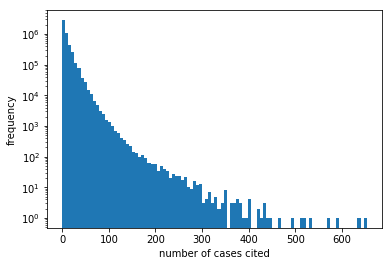

In [11]:
print("Ignoring that outlier case, distribution of cases cited (vertical log scale)")
_ = plt.hist(num_neighbors[:-1], log=True, bins=100)
_ = plt.ylabel("frequency")
_ = plt.xlabel("number of cases cited")

In [12]:
num_citers_mapping = {n: len(list(full.predecessors(n))) for n in full.nodes}
num_citers = list(num_citers_mapping.values())

Not surprisingly the distribution of citing cases is a lot more heavy tailed.


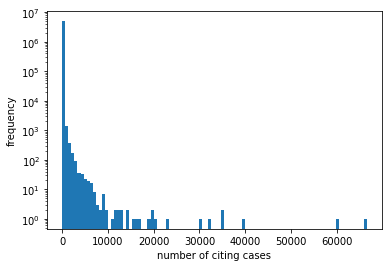

In [13]:
print("Not surprisingly the distribution of citing cases is a lot more heavy tailed.")
_ = plt.hist(num_citers, log=True, bins=100)
_ = plt.ylabel("frequency")
_ = plt.xlabel("number of citing cases")

In [40]:
num_citers.sort()

In [46]:
top_10_case_citations = num_citers[-1:-11:-1]

In [48]:
top_10_num_citers = {n : v for n, v in num_citers_mapping.items() if v in top_10_case_citations}

In [49]:
top_10_num_citers

{'6204802': 39800,
 '6182418': 35083,
 '10002': 20325,
 '6205783': 30384,
 '6206897': 66557,
 '6207800': 60464,
 '6167798': 19690,
 '12046400': 32611,
 '6182629': 35104,
 '3556136': 22631}

In [80]:
for case_id in top_10_num_citers:
    r = requests.get(url = "https://api.case.law/v1/cases/" + case_id, params = {"full_case":True})
    print(top_10_num_citers[case_id])
    print(r.json()['name'])
    print(r.json()['frontend_url'])

39800
STRICKLAND, SUPERINTENDENT, FLORIDA STATE PRISON, et al. v. WASHINGTON
https://cite.case.law/us/466/668/
35083
JACKSON v. VIRGINIA et al.
https://cite.case.law/us/443/307/
20325
McDONNELL DOUGLAS CORP. v. GREEN
https://cite.case.law/us/411/792/
30384
MATSUSHITA ELECTRIC INDUSTRIAL CO., LTD, et al. v. ZENITH RADIO CORP. et al.
https://cite.case.law/us/475/574/
66557
ANDERSON et al. v. LIBERTY LOBBY, INC., et al.
https://cite.case.law/us/477/242/
60464
CELOTEX CORP. v. CATRETT, ADMINISTRATRIX OF THE ESTATE OF CATRETT
https://cite.case.law/us/477/317/
19690
TERRY v. OHIO
https://cite.case.law/us/392/1/
32611
MIRANDA v. ARIZONA
https://cite.case.law/us/384/436/
35104
ANDERS v. CALIFORNIA
https://cite.case.law/us/386/738/
22631
BELL ATLANTIC CORP. et al. v. TWOMBLY et al.
https://cite.case.law/us/550/544/


In [71]:
len(r.json()["cites_to"])

139

In [75]:
num_neighbors_mapping[str(r.json()["id"])]

110

In [77]:
r.json()

{'id': 3556136,
 'url': 'https://api.case.law/v1/cases/3556136/',
 'name': 'BELL ATLANTIC CORP. et al. v. TWOMBLY et al.',
 'name_abbreviation': 'Bell Atlantic Corp. v. Twombly',
 'decision_date': '2007-05-21',
 'docket_number': 'No. 05-1126',
 'first_page': '544',
 'last_page': '597',
 'citations': [{'type': 'official', 'cite': '550 U.S. 544'},
  {'type': 'parallel', 'cite': '167 L. Ed. 2d 929'},
  {'type': 'parallel', 'cite': '127 S. Ct. 1955'},
  {'type': 'vendor', 'cite': '2007 U.S. LEXIS 5901'},
  {'type': 'vendor', 'cite': 'SCDB 2006-045'}],
 'volume': {'barcode': '32044115934465',
  'url': 'https://api.case.law/v1/volumes/32044115934465/',
  'volume_number': '550'},
 'reporter': {'full_name': 'United States Reports',
  'url': 'https://api.case.law/v1/reporters/983/',
  'id': 983},
 'court': {'slug': 'us',
  'url': 'https://api.case.law/v1/courts/us/',
  'id': 9009,
  'name_abbreviation': 'U.S.',
  'name': 'Supreme Court of the United States'},
 'jurisdiction': {'whitelisted': Fa

In [14]:
precedents_num_citers_mapping = {n : v for n, v in num_citers_mapping.items() if num_neighbors_mapping[n] == 0}

In [16]:
precedents_num_citers = list(precedents_num_citers_mapping.values())

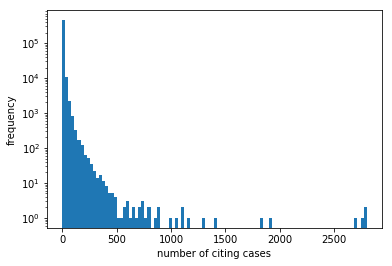

In [17]:
_ = plt.hist(precedents_num_citers, log=True, bins=100)
_ = plt.ylabel("frequency")
_ = plt.xlabel("number of citing cases")

In [ ]:
# Does not appear that the most cited cases were cases that cited no other cases.
# Makes sense that this would be an idealization at best
# Need to compare the two histograms
# Looks from raw eyeballing that these cases which cite no other cases are in fact just less influential.

Yup, cases with no citations are less influential


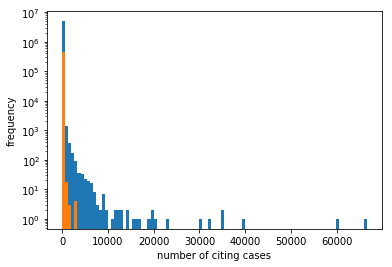

In [23]:
print("Yup, cases with no citations are less influential")
countsandbins = plt.hist(num_citers, log=True, bins=100)
bins=countsandbins[1]
_ = plt.ylabel("frequency")
_ = plt.xlabel("number of citing cases")
_ = plt.hist(precedents_num_citers, log=True, bins=bins)


In [24]:
# What can I do now?
# Missing example case (id 435800) from Illinois supreme court--not sure why...